# Rede ResNet50 com os pesos da ImageNet

In [1]:
import json
import keras
from keras import backend as K
from keras.applications.resnet50 import ResNet50
K.set_image_data_format("channels_last")

Using TensorFlow backend.


In [2]:
from keras.utils.data_utils import get_file

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results

def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.image_dim_ordering()
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


In [3]:
model = ResNet50(weights='imagenet')

print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

(639, 969, 3)


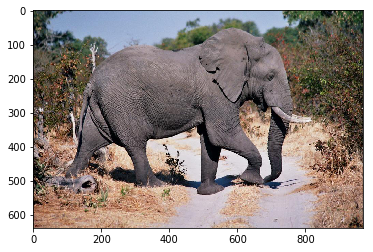

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from keras.preprocessing import image
#from imagenet_utils import preprocess_input, decode_predictions

img_path = '../data/horse.jpg'
img_path = '../data/mula.jpg'
img_path = '../data/Moremi_elephant.jpg'
f = mpimg.imread(img_path)
print(f.shape)
plt.imshow(f)

<class 'PIL.Image.Image'>
(224, 224, 3)


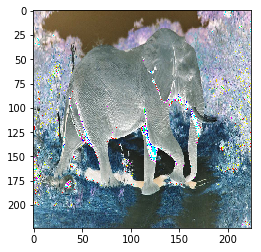

In [5]:
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))
x = image.img_to_array(img)
print(x.shape)
plt.imshow(x)

In [6]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [7]:
x = preprocess_input(x)

In [9]:
%timeit preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# print: [[u'n02504458', u'African_elephant']]

10 loops, best of 3: 164 ms per loop
Predicted: [[('n01871265', 'tusker', 0.53558028), ('n02504458', 'African_elephant', 0.40980956), ('n02504013', 'Indian_elephant', 0.05443598), ('n02397096', 'warthog', 0.00012552123), ('n02408429', 'water_buffalo', 1.1786394e-05)]]
